In [10]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np

In [11]:
## Matplotlib defaults ##
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.size': 22})

# Assembly Indicies over Generations

Graph assembly values as generations increase

In [12]:
# Read in json dictionary of compounds & assembly indicies
with open("Data/assembly_values_parallel_largeTimeout.json") as f:
    assembly_values = json.load(f)

In [13]:
#Read in network expansion output
df = pickle.load(file=open("Data/Output/CSE_0.p", "rb"))
print(df.head())

                                compounds_cumulative  \
0  [HIS, GLY, PHE, LEU, WATER, CPD-2041, CPD-674,...   
1  [HIS, GLY, PHE, LEU, WATER, CPD-2041, CPD-674,...   
2  [HIS, GLY, PHE, LEU, WATER, CPD-2041, CPD-674,...   
3  [HIS, GLY, PHE, LEU, WATER, CPD-2041, CPD-674,...   
4  [HIS, GLY, PHE, LEU, WATER, CPD-2041, CPD-674,...   

                                       compounds_new  \
0                                                 []   
1  [CPD-2041, CPD-674, CPD-14474, CPD-12151, CPD-...   
2  [AMMONIA, PROTON, CPD-12218, 4-IMIDAZOLONE-5-P...   
3  [PHENYLETHYLAMINE, CARBON-DIOXIDE, FORMYL-ISOG...   
4  [ISOGLUTAMINE, Benzoin, SALICYLALDEHYDE, FORMA...   

                                reactions_cumulative  \
0  [, RXN-22387, RXN-13484, RXN-15488, PHENYLALAN...   
1  [, RXN-22387, RXN-13484, RXN-15488, PHENYLALAN...   
2  [, RXN-22387, RXN-13484, RXN-15488, PHENYLALAN...   
3  [, RXN-22387, RXN-13484, RXN-15488, PHENYLALAN...   
4  [, RXN-22387, RXN-13484, RXN-15488, PHENYLA

## Assembly Values per Generation

Analyze assembly indicies over each generation

In [14]:
assembly_avgs = []
assembly_mins = []
assembly_maxs = []

failed = 0

for cpds in df["compounds_new"]:
    #Calculate average assembly value at each generation
    avs = []
    for cpd in cpds:
        avs.append(assembly_values[cpd])
        
    #Remove -1s (didn't work for a variety of reasons - possibly redo analysis?)
    failed += avs.count(-1)
    avs = [v for v in avs if v != -1]

    #Find min, max, and mean
    
    if avs:
        assembly_avgs.append(np.mean(avs))
        assembly_mins.append(min(avs))
        assembly_maxs.append(max(avs))
    else:
        assembly_avgs.append(0)
        assembly_mins.append(0)
        assembly_maxs.append(0)

In [15]:
print(float(failed) / df["n_compounds_cumulative"].iloc[-1], "failed")

0.25257731958762886 failed


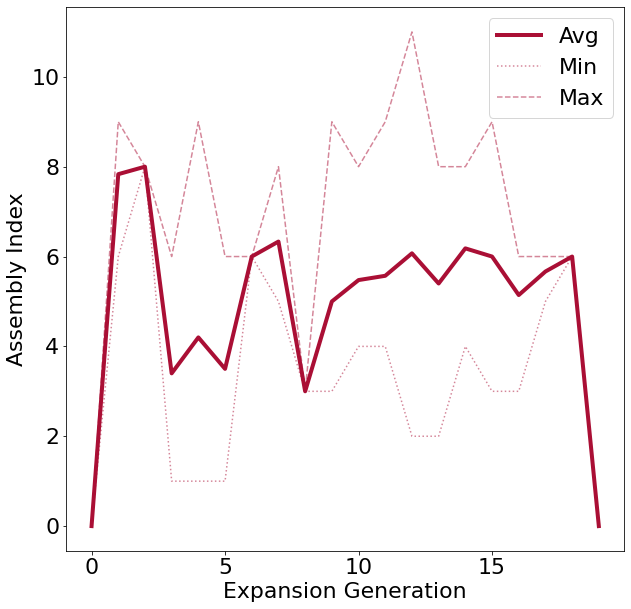

In [16]:
#Plot showing average assembly value, along with min & max
plt.figure(figsize=(10,10))

plt.plot(assembly_avgs, linewidth=4, label="Avg", color="#aa0f35")
plt.plot(assembly_mins, alpha=0.5, color="#aa0f35", linestyle=":", label="Min")
plt.plot(assembly_maxs, alpha=0.5, color="#aa0f35", linestyle="--", label="Max")

plt.ylabel("Assembly Index")
plt.xlabel("Expansion Generation")
plt.legend()